# Datathon 2023 Fashion Compatibility

**Authors:** Dante Chaguaceda, Aiman Himi, Adrià Rodriguez, Francesco Tedesco 
**Date:** November 12, 2023  
**Description:** This file contains the pre processing and prediction process

---

## Table of Contents

1. [Pre processing](#Pre-processing) This section focuses on preparing the dataset for training the models by performing various pre-processing steps.
2. [Deep Learning](#Deep-Learning) Introduce the limitations of the first model, which is based on deep learning techniques. 
3. [Random Forest](#Random-Forest) Implement a second model using the Random Forest algorithm.
4. [Visualization](#Predictions) In this last section we visualize the prediction results obtained with the Random Forest Regressor Model


# Pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Define a dictionary for color RGB data
colors_rgb = {'OFFWHITE': np.array([250, 249, 246]),
              'TEJANO OSCURO': np.array([52, 63, 81]),
              'ROSA PASTEL': np.array([253,202,225]),
              'MOSTAZA': np.array([246,167,0]),
              'ROJO': np.array([255, 0, 0]),
              'GRIS MEDIO VIGORE': np.array([74,80,83]),
              'CARAMELO': np.array([174,105,56]),
              'KHAKI': np.array([240, 230, 140]),
              'GRIS OSCURO VIGORE': np.array([51, 47, 44]),
              'CRUDO': np.array([194, 178, 128]),
              'FRESA': np.array([213, 48, 50]),
              'BEIGE': np.array([245, 245, 220]),
              'CHOCOLATE': np.array([122, 46, 17]),
              'NEGRO': np.array([0, 0, 0]),
              'ROSA PALO': np.array([255, 192, 203]),
              'TEJANO MEDIO': np.array([87, 110, 138]),
              'AMARILLO': np.array([255, 255, 0]),
              'BLANCO': np.array([255, 255, 255]),
              'ARENA': np.array([194, 178, 128]),
              'MORADO': np.array([128, 0, 128]),
              'MARRON': np.array([139, 69, 19]),
              'AZUL': np.array([0, 0, 255]),
              'AGUA': np.array([0, 255, 255]),
              'NAVY': np.array([0, 0, 128]),
              'TEJANO GRIS OSCURO': np.array([70, 70, 70]),
              'CAMEL': np.array([193, 154, 107]),
              'VERDE': np.array([0, 128, 0]),
              'ROSA': np.array([255, 182, 193]),
              'FUCSIA': np.array([255, 0, 255]),
              'GRIS CLARO VIGORE': np.array([200, 200, 200]),
              'CUERO': np.array([139, 69, 19]),
              'VISON': np.array([138, 110, 93]),
              'TEJANO CLARO': np.array([173, 216, 230]),
              'PLATA': np.array([192, 192, 192]),
              'GRIS': np.array([128, 128, 128]),
              'NUDE': np.array([222, 184, 135]),
              'ORO': np.array([255, 215, 0]),
              'TURQUESA': np.array([64, 224, 208]),
              'TEJANO NEGRO': np.array([0, 0, 0]),
              'NARANJA': np.array([255, 165, 0]),
              'DIRTY': np.array([131, 111, 255]),
              'HIELO': np.array([176, 224, 230]),
              'CELESTE': np.array([173, 216, 230]),
              'BURDEOS': np.array([128, 0, 32]),
              'AMARILLO FLUOR': np.array([255, 255, 85]),
              'PIEDRA': np.array([162, 128, 84]),
              'MALVA': np.array([221, 160, 221]),
              'ROSA LIGHT': np.array([255, 182, 193]),
              'MARINO': np.array([0, 0, 128]),
              'MANDARINA': np.array([255, 165, 0]),
              'TERRACOTA': np.array([204, 78, 92]),
              'CALDERO': np.array([127, 127, 127]),
              'GRANATE': np.array([128, 0, 0]),
              'TOPO': np.array([117, 109, 102]),
              'VERDE PASTEL': np.array([152, 251, 152]),
              'AZUL NOCHE': np.array([25, 25, 112]),
              'MISTERIO': np.array([50, 50, 50]),
              'LIMA': np.array([0, 255, 0]),
              'COFFEE': np.array([111, 78, 55]),
              'PERLA': np.array([234, 234, 234]),
              'ESMERALDA': np.array([0, 201, 87]),
              'OCRE': np.array([204, 119, 34]),
              'VIOLETA': np.array([238, 130, 238]),
              'VINO': np.array([128, 0, 0]),
              'MARFIL': np.array([255, 255, 240]),
              'BOTELLA': np.array([0, 128, 0]),
              'ANTRACITA': np.array([45, 45, 45]),
              'PEACH': np.array([255, 218, 185]),
              'VAINILLA': np.array([245, 245, 220]),
              'TABACO': np.array([165, 42, 42]),
              'ELECTRICO': np.array([125, 249, 255]),
              'AMARILLO PASTEL': np.array([255, 255, 182]),
              'PORCELANA': np.array([240, 240, 240]),
              'TAUPE': np.array([72, 60, 50]),
              'COBRE': np.array([184, 115, 51]),
              'CANELA': np.array([210, 105, 30]),
              'PETROLEO': np.array([0, 128, 128]),
              'CORAL': np.array([255, 127, 80]),
              'LILA': np.array([200, 162, 200]),
              'COGNAC': np.array([156, 82, 45]),
              'OLIVA': np.array([128, 128, 0]),
              'MENTA': np.array([0, 255, 128]),
              'TEJANO GRIS CLARO': np.array([192, 192, 192]),
              'TEJANO GRIS': np.array([128, 128, 128]),
              'DIRTY OSCURO': np.array([75, 0, 130]),
              'BLEACH': np.array([255, 255, 224]),
              'NARANJA PASTEL': np.array([255, 218, 185]),
              'CAZA': np.array([139, 69, 19]),
              'BLOOD': np.array([102, 0, 0]),
              'CEREZA': np.array([222, 49, 99]),
              'CENIZA': np.array([192, 192, 192]),
              'CURRY': np.array([128, 128, 0]),
              'BLUEBLACK': np.array([0, 0, 139]),
              'SALMON': np.array([250, 128, 114]),
              'CHICLE': np.array([255, 182, 193]),
              'TEJANO SOFT': np.array([173, 216, 230]),
              'GUNMETAL': np.array([42, 42, 42]),
              'MANZANA': np.array([0, 128, 0]),
              'BILLAR': np.array([0, 128, 128]),
              'MUSGO': np.array([0, 128, 0]),
              'TINTA': np.array([0, 0, 128]),
              'INDIGO': np.array([75, 0, 130]),
              'ROSA FLUOR': np.array([255, 0, 255]),
              'DIRTY CLARO': np.array([171, 171, 171]),
              'CIRUELA': np.array([221, 160, 221]),
              'BERMELLON': np.array([255, 69, 0]),
              'GERANIO': np.array([255, 69, 0]),
              'PIMENTON': np.array([176, 23, 31]),
              'PRUSIA': np.array([0, 49, 83]),
              'ASFALTO': np.array([24, 24, 24]),
  }

for k, v in colors_rgb.items():
    colors_rgb[k] = v/255

In [3]:
dataset = pd.read_csv('./dataset/product_data.csv')

# Change colors
dataset[['R', 'G', 'B']] = pd.DataFrame(dataset['des_color_specification_esp'].map(colors_rgb).tolist(), index=dataset.index)

dataset = dataset[dataset['des_sex'] == "Female"]
dataset = dataset[dataset['des_age'] == "Adult"]

# Delete unuseful columns
dataset.drop(columns=["des_sex", "des_age",  'des_color_specification_esp', "des_agrup_color_eng", "cod_color_code",  "des_line",  "des_product_type", "des_product_family", "des_product_aggregated_family", "des_product_category",  "des_filename"], axis=1, inplace=True)


# X = dataset.iloc[:, 3:13].values
# y = dataset.iloc[:, 13].values

In [4]:
# One-Hot encoding
ce_OHE = ce.OneHotEncoder(cols=['des_fabric']) 
dataset = ce_OHE.fit_transform(dataset)

In [ ]:
# Create joined
merged_products = dataset.merge(dataset, how='cross').sample(frac=0.01, random_state=11)
# merged_products.to_csv('merged_products.csv', index=False)

In [ ]:
outfits = pd.read_csv('./dataset/outfit_data.csv')
outfits_n = outfits.groupby('cod_outfit')['cod_modelo_color'].agg(lambda x: list(x)).reset_index()

In [ ]:
merged_products["result"] = 0
merged_products.reset_index(inplace=True)  # Add inplace=True to modify the original DataFrame

for i, row in merged_products.iterrows():
    r1 = row['cod_modelo_color_x']
    r2 = row['cod_modelo_color_y']
    
    if i%1000 == 0:
        print("\n")
        print(i, r1, r2)  # Corrected the print statement
    
    current = outfits_n['cod_modelo_color']
    comp = current.apply(lambda x: r1 in x and r2 in x)
    # Check if there's any row in outfits_n that contains both r1 and r2
    if any(comp):
        comp_1 = current.apply(lambda x: r1 in x)
        comp_2 = current.apply(lambda x: r2 in x)
        merged_products.at[i, "result"] = comp.sum() / (comp_1.sum() + comp_2.sum())  # Use at to modify the original DataFrame
        print(":)", i, comp.sum() / (comp_1.sum() + comp_2.sum()))  # Corrected the print statement
        

In [1]:
merged_products.to_csv('merged_products_percentage.csv', index=False)

NameError: name 'merged_products' is not defined

In [3]:
merged_products = pd.read_csv("merged_products_percentage.csv")
merged_products.drop(columns=["cod_modelo_color_x", "cod_modelo_color_y"], axis=1, inplace=True)
merged_products.drop(columns=["index"], axis=1, inplace=True)
# merged_products.drop(columns=["level_0"], axis=1, inplace=True)

In [4]:
X = merged_products.iloc[:, :-1].values
y = merged_products.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 735)

# Deep Learning

We first tried the following deep learning approach

In [58]:
# Import Keras and other additional libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import Adam

In [61]:
# Inicializar la RNA
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units = 32, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 20))
classifier.add(Dropout(rate = 0.2))
# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units = 32, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(rate = 0.2))
# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units = 32, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(rate = 0.2))
# Añadir las capas de entrada y 2rimera capa oculta
classifier.add(Dense(units = 32, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(rate = 0.2))

# Añadir la capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

# Compilar la RNA
a = Adam(
    learning_rate=0.1,
    beta_1=0.6,
    beta_2=0.8,
    epsilon=1e-06,
    amsgrad=False,
    weight_decay=True,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
)
classifier.compile(optimizer = a, loss = "mse", metrics = ["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 1000, epochs = 10)

Epoch 1/10
754/754 [==============================] - 4s 5ms/step - loss: 6.1740e-04 - accuracy: 0.9971
Epoch 2/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5143e-05 - accuracy: 0.9982
Epoch 3/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5025e-05 - accuracy: 0.9982
Epoch 4/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5866e-05 - accuracy: 0.9982
Epoch 5/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5496e-05 - accuracy: 0.9982
Epoch 6/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5015e-05 - accuracy: 0.9982
Epoch 7/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5244e-05 - accuracy: 0.9982
Epoch 8/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5146e-05 - accuracy: 0.9982
Epoch 9/10
754/754 [==============================] - 3s 4ms/step - loss: 4.5040e-05 - accuracy: 0.9982
Epoch 10/10
754/754 [==============================] - 3s 4ms/st

Due to overfitting problems, we decided to follow a different approach using the Random Forest Regressor model.   

# Random Forest

In [2]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [87]:
# Define the Random Forest Regressor
r = RFR(n_estimators=32, n_jobs=-1, min_samples_split=4, max_depth=32, max_features="sqrt")
r.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, max_features='sqrt', min_samples_split=4,
                      n_estimators=32, n_jobs=-1)

In [150]:
import pickle

# Save the model trained
with open("modelRFR.pkl", "wb") as f:
    pickle.dump(classifier, f)

# Visualization

In [147]:
raw_dataset = pd.read_csv('./dataset/product_data.csv')
raw_dataset = raw_dataset[raw_dataset['des_sex'] == "Female"]
raw_dataset = raw_dataset[raw_dataset['des_age'] == "Adult"]

not_with_it_cat = {"Bottoms": set(["Bottoms"]), "Dresses, jumpsuits and Complete set": set(["Tops", "Dresses, jumpsuits and Complete set"]),
                   "Tops": set(["Tops"]), "Outerwear": set(["Outerwear"])}
not_with_it_type = {"Dress": set(["Skirt", "Shorts", "T-Shirt"]), "Scarf": set(["Scarf"]), "Jacket": set(["Jacket"]),
                    "Umbrella": set(["Umbrella"])}

def show_outfit(image_paths: list):
    # Create a 3x2 grid of subplots
    y = 2
    x = (len(image_paths) + 1) // y
    fig, axs = plt.subplots(x, y, figsize=(10, 10))

    # Flatten the 3x2 grid into a 1D array for easy iteration
    axs = axs.flatten()

    # Loop through the images and display them in the subplots
    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(f"{image_path}".replace("datathon", "."))
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off axis labels

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()

def get_most_similars(classifier, dataset, row):
    # Convert the row to a DataFrame with a single row
    row_df = pd.DataFrame(row).T
    # Merge the row with the dataset using 'cross' method
    internal_ds_1 = pd.merge(row_df, dataset, how='cross')
    internal_ds_2 = pd.merge(dataset, row_df, how='cross')
    
    # internal_ds.reset_index(inplace=True)
    internal_ds_1.drop(columns=["cod_modelo_color_x", "cod_modelo_color_y"], axis=1, inplace=True)
    internal_ds_2.drop(columns=["cod_modelo_color_x", "cod_modelo_color_y"], axis=1, inplace=True)
    i = internal_ds_1.to_numpy(dtype="float64")
    j = internal_ds_2.to_numpy(dtype="float64")
    y_pred = np.maximum(classifier.predict(i), classifier.predict(j))
    print(np.argmax(y_pred), max(y_pred), min(y_pred), np.mean(y_pred))
    return y_pred, list(reversed(np.argsort(y_pred).tolist()))

def get_img_path_from_prediciton(outfit):
    paths = []
    for el in outfit:
        print(el["cod_modelo_color"])
        paths.append(el["des_filename"])
    return paths

def get_predictions(dataset, row, prediction, n: int):
    outfit = [row]
    i = 0
    i_prev = -1
    for _ in range(n):
        while i != i_prev:
            i_prev = i
            pred = dataset.iloc[prediction[i]]
            if row["cod_modelo_color"] == pred["cod_modelo_color"]: # Mateixa prenda
                i += 1
                continue
            
            r_cat = [r["des_product_category"] for r in outfit]
            p_cat = pred["des_product_category"]
            r_type = [r["des_product_type"] for r in outfit]
            p_type = pred["des_product_type"]
            for k, v in not_with_it_cat.items():
                if (k in r_cat and p_cat in v) or (len(v.intersection(r_cat))!=0 and p_cat == k):
                    i += 1
                    continue
            
            for k, v in not_with_it_type.items():
                if (k in r_type and p_type in v) or (len(v.intersection(r_type))!=0 and p_type == k):
                    i += 1
                    continue
                
        outfit.append(dataset.iloc[prediction[i],:])
        i += 1
    return outfit



In [226]:
colors_rgb = {'OFFWHITE': np.array([250, 249, 246]),
              'TEJANO OSCURO': np.array([52, 63, 81]),
              'ROSA PASTEL': np.array([253,202,225]),
              'MOSTAZA': np.array([246,167,0]),
              'ROJO': np.array([255, 0, 0]),
              'GRIS MEDIO VIGORE': np.array([74,80,83]),
              'CARAMELO': np.array([174,105,56]),
              'KHAKI': np.array([240, 230, 140]),
              'GRIS OSCURO VIGORE': np.array([51, 47, 44]),
              'CRUDO': np.array([194, 178, 128]),
              'FRESA': np.array([213, 48, 50]),
              'BEIGE': np.array([245, 245, 220]),
              'CHOCOLATE': np.array([122, 46, 17]),
              'NEGRO': np.array([0, 0, 0]),
              'ROSA PALO': np.array([255, 192, 203]),
              'TEJANO MEDIO': np.array([87, 110, 138]),
              'AMARILLO': np.array([255, 255, 0]),
              'BLANCO': np.array([255, 255, 255]),
              'ARENA': np.array([194, 178, 128]),
              'MORADO': np.array([128, 0, 128]),
              'MARRON': np.array([139, 69, 19]),
              'AZUL': np.array([0, 0, 255]),
              'AGUA': np.array([0, 255, 255]),
              'NAVY': np.array([0, 0, 128]),
              'TEJANO GRIS OSCURO': np.array([70, 70, 70]),
              'CAMEL': np.array([193, 154, 107]),
              'VERDE': np.array([0, 128, 0]),
              'ROSA': np.array([255, 182, 193]),
              'FUCSIA': np.array([255, 0, 255]),
              'GRIS CLARO VIGORE': np.array([200, 200, 200]),
              'CUERO': np.array([139, 69, 19]),
              'VISON': np.array([138, 110, 93]),
              'TEJANO CLARO': np.array([173, 216, 230]),
              'PLATA': np.array([192, 192, 192]),
              'GRIS': np.array([128, 128, 128]),
              'NUDE': np.array([222, 184, 135]),
              'ORO': np.array([255, 215, 0]),
              'TURQUESA': np.array([64, 224, 208]),
              'TEJANO NEGRO': np.array([0, 0, 0]),
              'NARANJA': np.array([255, 165, 0]),
              'DIRTY': np.array([131, 111, 255]),
              'HIELO': np.array([176, 224, 230]),
              'CELESTE': np.array([173, 216, 230]),
              'BURDEOS': np.array([128, 0, 32]),
              'AMARILLO FLUOR': np.array([255, 255, 85]),
              'PIEDRA': np.array([162, 128, 84]),
              'MALVA': np.array([221, 160, 221]),
              'ROSA LIGHT': np.array([255, 182, 193]),
              'MARINO': np.array([0, 0, 128]),
              'MANDARINA': np.array([255, 165, 0]),
              'TERRACOTA': np.array([204, 78, 92]),
              'CALDERO': np.array([127, 127, 127]),
              'GRANATE': np.array([128, 0, 0]),
              'TOPO': np.array([117, 109, 102]),
              'VERDE PASTEL': np.array([152, 251, 152]),
              'AZUL NOCHE': np.array([25, 25, 112]),
              'MISTERIO': np.array([50, 50, 50]),
              'LIMA': np.array([0, 255, 0]),
              'COFFEE': np.array([111, 78, 55]),
              'PERLA': np.array([234, 234, 234]),
              'ESMERALDA': np.array([0, 201, 87]),
              'OCRE': np.array([204, 119, 34]),
              'VIOLETA': np.array([238, 130, 238]),
              'VINO': np.array([128, 0, 0]),
              'MARFIL': np.array([255, 255, 240]),
              'BOTELLA': np.array([0, 128, 0]),
              'ANTRACITA': np.array([45, 45, 45]),
              'PEACH': np.array([255, 218, 185]),
              'VAINILLA': np.array([245, 245, 220]),
              'TABACO': np.array([165, 42, 42]),
              'ELECTRICO': np.array([125, 249, 255]),
              'AMARILLO PASTEL': np.array([255, 255, 182]),
              'PORCELANA': np.array([240, 240, 240]),
              'TAUPE': np.array([72, 60, 50]),
              'COBRE': np.array([184, 115, 51]),
              'CANELA': np.array([210, 105, 30]),
              'PETROLEO': np.array([0, 128, 128]),
              'CORAL': np.array([255, 127, 80]),
              'LILA': np.array([200, 162, 200]),
              'COGNAC': np.array([156, 82, 45]),
              'OLIVA': np.array([128, 128, 0]),
              'MENTA': np.array([0, 255, 128]),
              'TEJANO GRIS CLARO': np.array([192, 192, 192]),
              'TEJANO GRIS': np.array([128, 128, 128]),
              'DIRTY OSCURO': np.array([75, 0, 130]),
              'BLEACH': np.array([255, 255, 224]),
              'NARANJA PASTEL': np.array([255, 218, 185]),
              'CAZA': np.array([139, 69, 19]),
              'BLOOD': np.array([102, 0, 0]),
              'CEREZA': np.array([222, 49, 99]),
              'CENIZA': np.array([192, 192, 192]),
              'CURRY': np.array([128, 128, 0]),
              'BLUEBLACK': np.array([0, 0, 139]),
              'SALMON': np.array([250, 128, 114]),
              'CHICLE': np.array([255, 182, 193]),
              'TEJANO SOFT': np.array([173, 216, 230]),
              'GUNMETAL': np.array([42, 42, 42]),
              'MANZANA': np.array([0, 128, 0]),
              'BILLAR': np.array([0, 128, 128]),
              'MUSGO': np.array([0, 128, 0]),
              'TINTA': np.array([0, 0, 128]),
              'INDIGO': np.array([75, 0, 130]),
              'ROSA FLUOR': np.array([255, 0, 255]),
              'DIRTY CLARO': np.array([171, 171, 171]),
              'CIRUELA': np.array([221, 160, 221]),
              'BERMELLON': np.array([255, 69, 0]),
              'GERANIO': np.array([255, 69, 0]),
              'PIMENTON': np.array([176, 23, 31]),
              'PRUSIA': np.array([0, 49, 83]),
              'ASFALTO': np.array([24, 24, 24]),
  }

for k, v in colors_rgb.items():
    colors_rgb[k] = v/255

class Predictor():
    def __init__(self, product_dataset_path: str, classifier):
        self.raw_dataset = pd.read_csv(product_dataset_path)
        self.raw_dataset = raw_dataset[raw_dataset['des_sex'] == "Female"]
        self.raw_dataset = raw_dataset[raw_dataset['des_age'] == "Adult"]
        self.dataset = self.raw_dataset.copy()
        
        # Change colors
        self.dataset[['R', 'G', 'B']] = pd.DataFrame(self.dataset['des_color_specification_esp'].map(colors_rgb).tolist(), index=self.dataset.index)
        # Delete unuseful columns
        self.dataset.drop(columns=["des_sex", "des_age",  'des_color_specification_esp', "des_agrup_color_eng", "cod_color_code",  "des_line",  "des_product_type", "des_product_family", "des_product_aggregated_family", "des_product_category",  "des_filename"], axis=1, inplace=True)
        # One-Hot encoding
        ce_OHE = ce.OneHotEncoder(cols=['des_fabric']) 
        self.dataset = ce_OHE.fit_transform(self.dataset)
        
        
        self.classifier = classifier


        self.not_with_it_cat = {"Bottoms": set(["Bottoms"]), "Dresses, jumpsuits and Complete set": set(["Tops", "Dresses, jumpsuits and Complete set"]),
                                "Tops": set(["Tops"]), "Outerwear": set(["Outerwear"])}
        self.not_with_it_type = {"Dress": set(["Skirt", "Shorts", "T-Shirt"]), "Scarf": set(["Scarf"]), "Jacket": set(["Jacket"]),
                                 "Umbrella": set(["Umbrella"])}
        
        
    def get_most_similars(self, row):
        # Convert the row to a DataFrame with a single row
        row_df = pd.DataFrame(row).T
        # Merge the row with the dataset using 'cross' method
        internal_ds_1 = pd.merge(row_df, self.dataset, how='cross')
        internal_ds_2 = pd.merge(self.dataset, row_df, how='cross')
        
        # internal_ds.reset_index(inplace=True)
        internal_ds_1.drop(columns=["cod_modelo_color_x", "cod_modelo_color_y"], axis=1, inplace=True)
        internal_ds_2.drop(columns=["cod_modelo_color_x", "cod_modelo_color_y"], axis=1, inplace=True)
        i = internal_ds_1.to_numpy(dtype="float64")
        j = internal_ds_2.to_numpy(dtype="float64")
        y_pred = np.maximum(self.classifier.predict(i), self.classifier.predict(j))
        return list(reversed(np.argsort(y_pred).tolist()))
    
    
    def get_img_path_from_prediciton(self, outfit):
        paths = []
        for el in outfit:
            print(el["cod_modelo_color"])
            paths.append(el["des_filename"])
        return paths
    
    
    def get_predictions(self, row, prediction, n: int, n_outfits):
        outfits = []
        if n_outfits > 0:
            i, new_outfit = self.get_predictions(row, prediction, n, n_outfits-1)
            outfits.extend(new_outfit)
        else:
            i = 0
        outfit = [row]
        i_prev = -1
        new_i = -1
        for _ in range(n):
            while i != i_prev:
                i_prev = i
                pred = self.raw_dataset.iloc[prediction[i], :]
                if row["cod_modelo_color"] == pred["cod_modelo_color"]: # Mateixa prenda
                    i += 1
                    continue
                
                r_cat = [r["des_product_category"] for r in outfit]
                p_cat = pred["des_product_category"]
                r_type = [r["des_product_type"] for r in outfit]
                p_type = pred["des_product_type"]
                for k, v in self.not_with_it_cat.items():
                    if (k in r_cat and p_cat in v) or (len(v.intersection(r_cat))!=0 and p_cat == k):
                        i += 1
                        continue
                
                for k, v in self.not_with_it_type.items():
                    if (k in r_type and p_type in v) or (len(v.intersection(r_type))!=0 and p_type == k):
                        i += 1
                        continue
                    
            outfit.append(pred)
            i += 1
            if new_i < 0:
                new_i = i
        outfits.append(outfit)
        return new_i, outfits
    
    
    def predict(self, id: str|int, n_images: int, n_outfits: int):
        index = id if type(id) == int else self.raw_dataset.index[self.raw_dataset["cod_modelo_color"] == id].tolist()[0]
        index_sorted = self.get_most_similars(self.dataset.loc[index, :])
        _, outfits = self.get_predictions(self.raw_dataset.loc[index, :], index_sorted, n_images-1, n_outfits)
        return [self.get_img_path_from_prediciton(outfit) for outfit in outfits]
        
        


57057700-99
57057126-CO
57037127-CO
53083718-90
53083036-90
57037882-90
57057700-99
57037127-CO
57022884-90
53083718-90
53083036-90
57037882-90
57057700-99
57099214-90
53023045-90
53083718-90
53083036-90
57037882-90
57057700-99
57022884-90
51085025-90
53083718-90
53083036-90
57037882-90


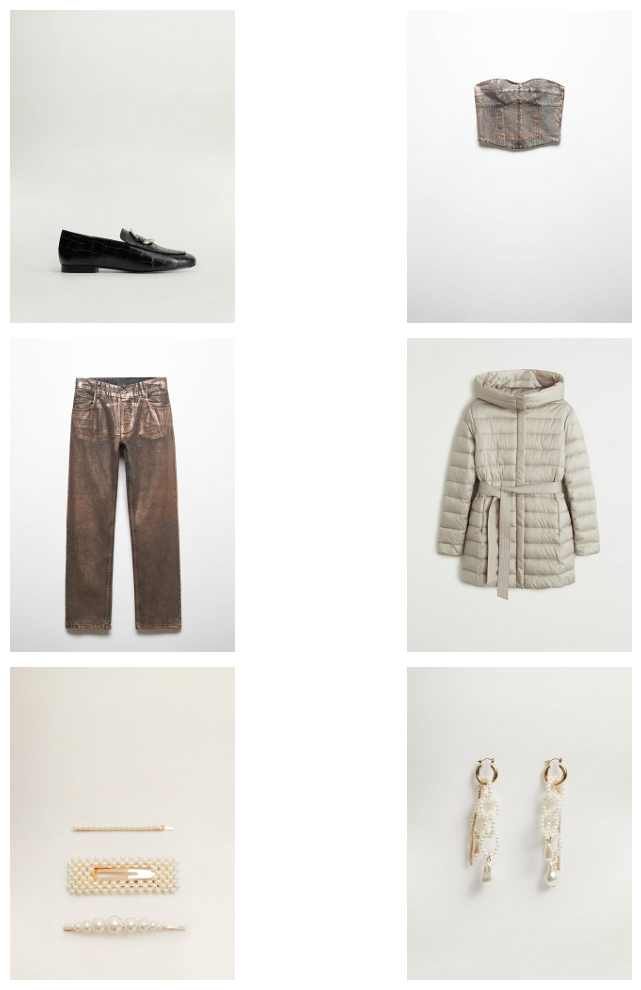

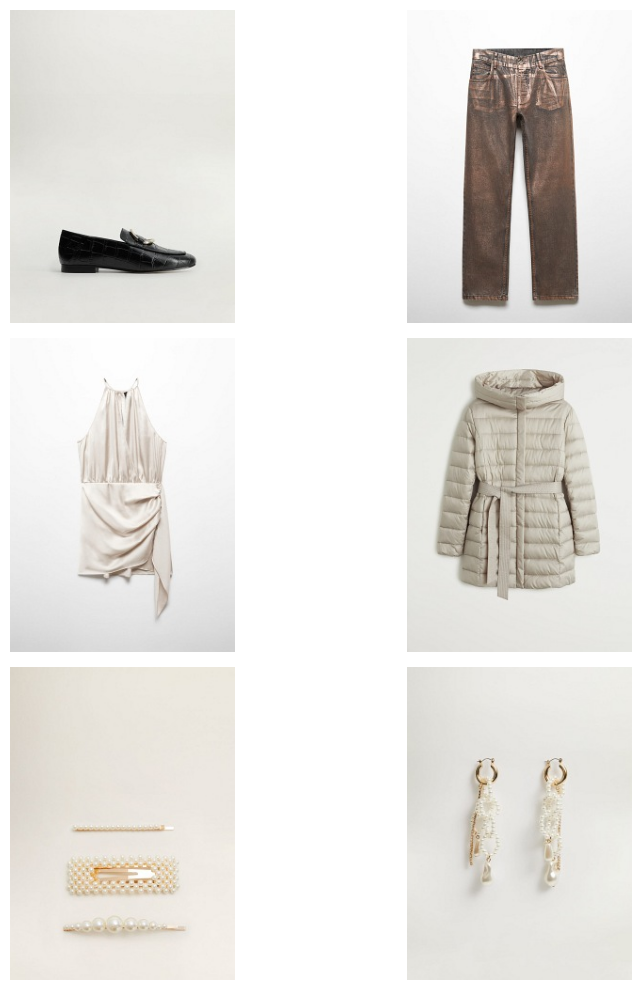

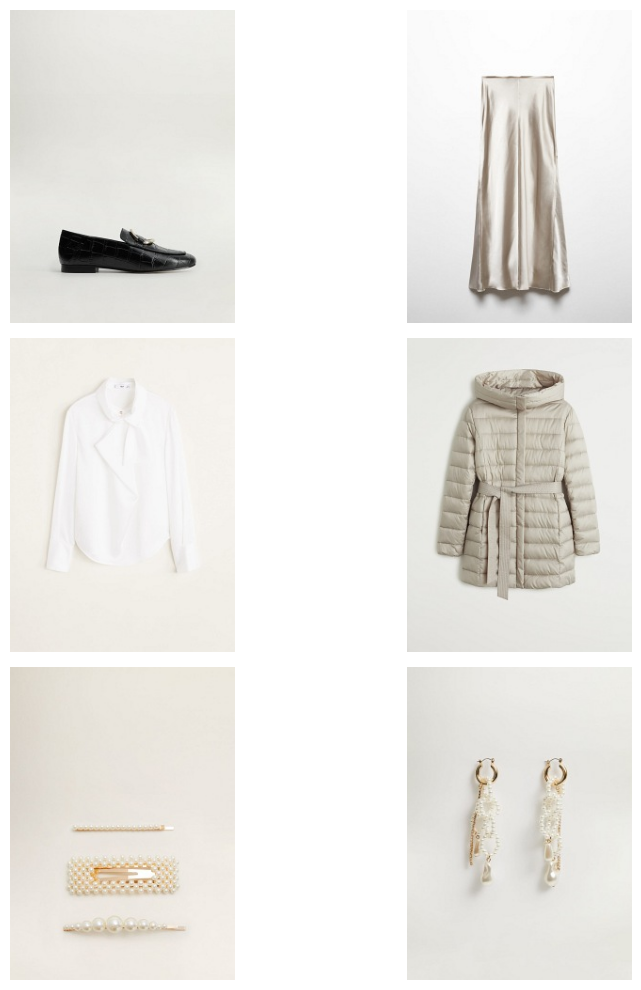

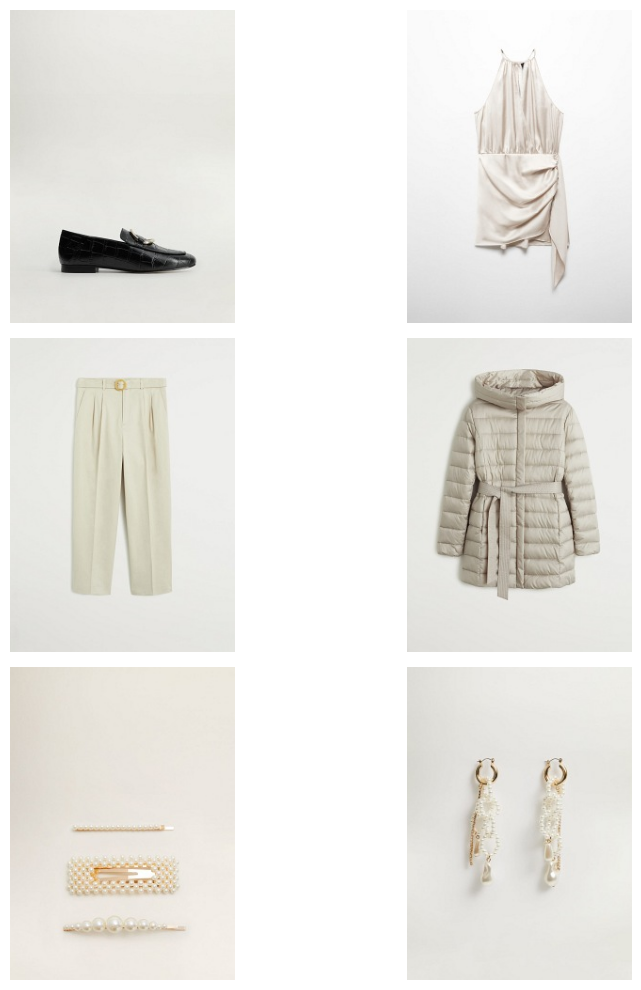

In [227]:
# Make the predictions
p = Predictor("./dataset/product_data.csv", r)
for outfit in p.predict(55, 6, 3):
    show_outfit(outfit)